In [3]:
from sklearn import linear_model
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy.linalg as linalg


In [4]:
X_data = np.load("x_values.npy")
Y_data = np.load("y_values.npy")
print(Y_data)

[[ 0.09846382]
 [-0.79926814]
 [-1.8003178 ]
 [-2.37500039]
 [-2.51103567]
 [-3.31780602]
 [-4.02080948]
 [-4.01115833]
 [-5.48492014]
 [-5.41791091]]


ValueError: ignored

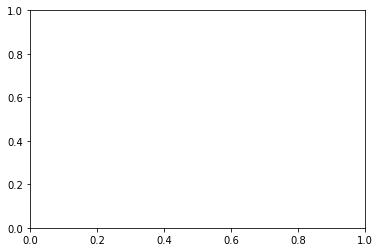

In [19]:
plt.scatter(X_data,Y_data)


In [6]:
linModel = linear_model.LinearRegression()
linModel.fit(X_data, Y_data)

LinearRegression()

ValueError: ignored

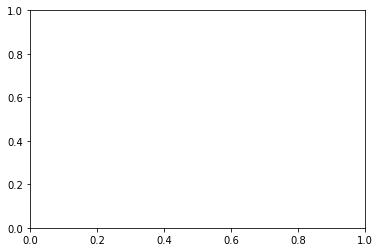

In [18]:
test_X = np.load("test_x_values.npy")
y_predict = linModel.predict(test_X)
plt.scatter(X_data, Y_data)
plt.plot(test_X,y_predict)
plt.title("Linear Regression Space")


In [8]:
linModel.predict([[0.48]])

array([[-3.14442237]])

Task 3.2

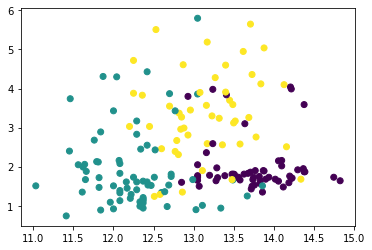

In [9]:
wine_data = np.load("wineData.npy")
wine_labels = np.load("wineLabels.npy")
plt.scatter(wine_data[:,0],wine_data[:,1], c=wine_labels)
plt.title("Wine Dataset in Original feature Space")
plt.yaxis("Original feature 1")
plt.xaxis("Original feature 0")


They data consists of real numbers

In [10]:

#train_data,test_data = train_test_split(wine_data, test_size = 0.8)
#train_labels,test_labels = train_test_split(wine_labels, test_size = 0.8)
train_data,test_data, train_labels,test_labels = train_test_split(wine_data, wine_labels,  test_size=0.20, random_state=0)

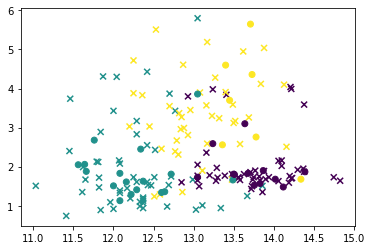

In [11]:
plt.scatter(train_data[:,0],train_data[:,1], c=train_labels, marker = "x")
plt.scatter(test_data[:,0], test_data[:,1], c=test_labels,marker = "o")

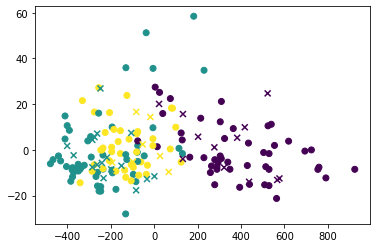

In [12]:
pca = PCA(2)
pca_features = pca.fit_transform(train_data)
pca_features_2 = pca.fit_transform(test_data)
plt.scatter(pca_features[:,0], pca_features[:,1], c=train_labels, marker="o")
plt.scatter(pca_features_2[:,0], pca_features_2[:,1], c=test_labels,marker = "x")
plt.title("Wine Dataset in Principle Component Space")
plt.yaxis("Principle Component 1")
plt.xaxis("Principle Component 0")


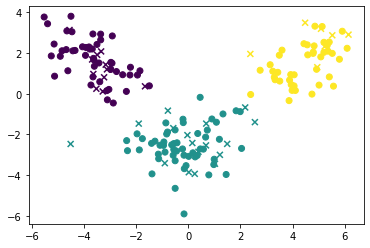

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_features_train = lda.fit(train_data, train_labels)
new_train = lda.transform(train_data)
lda_features_test = lda.transform(test_data)
plt.scatter(new_train[:,0],new_train[:,1], c=train_labels, marker="o")
plt.scatter(lda_features_test[:,0], lda_features_test[:,1], c=test_labels, marker='x')
plt.title("Wine Dataset in Linear Discriminant Space")
plt.yaxis("Component 1")
plt.xaxis("Component 0")


number of rows in train data: 142
number of columns in train data: 13
142
len of vector:  13
13
len of vector:  13


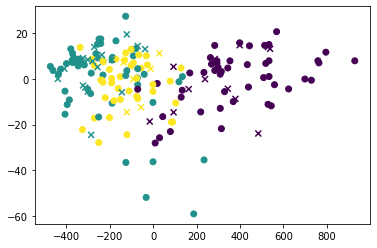

In [14]:



def initialise_mean_matrix(X_matrix):
  matrix = X_matrix
  mean_matrix = []
  print(len(matrix))
  dimensions = len(matrix[0])
  for i in range(dimensions):
    mean_matrix.append(mean_of_dimension(matrix, i))
  return mean_matrix


def mean_of_dimension(X_matrix, dimension):
  total = 0
  count = len(X_matrix)
  for i in range(0,len(X_matrix)-1):
    #print(X_matrix[i][dimension])
    total += X_matrix[i][dimension]
  mean = total/count
  return mean

print("number of rows in train data:", len(train_data))
print("number of columns in train data:", len(train_data[0]))

mean_vector = initialise_mean_matrix(train_data)

def subtract_from_means(X_matrix, mean_vector):
  new_matrix = []
  print("len of vector: ", len(mean_vector))
  for i in range(0,len(X_matrix)):
    new_matrix.append(np.subtract(X_matrix[i],mean_vector))
    
  return new_matrix

mean_centre_array = subtract_from_means(train_data, mean_vector)
mean_centre_array_two = np.array(mean_centre_array)
print(len(mean_centre_array[1]))
u,s,vh = np.linalg.svd(mean_centre_array_two, full_matrices = True)

projection_matrix = vh

projected_train_data = mean_centre_array_two @ np.transpose(projection_matrix[:2,:])

mean_centre_test_array = subtract_from_means(test_data,mean_vector)
projected_test_data = mean_centre_test_array @ np.transpose(projection_matrix)

plt.scatter(projected_train_data[:,0], projected_train_data[:,1], c = train_labels, marker = 'o')
plt.scatter(projected_test_data[:,0], projected_test_data[:,1], c=test_labels, marker = 'x')
plt.title("Wine Dataset in Principle Component Space")
plt.yaxis("Component 1")
plt.xaxis("Component 0")


task 3.5


In [16]:
X_data = np.load("task3_5_data.npy")
print(len(X_data))
labels = np.load("task3_5_labels.npy")
train_data, train_labels, test_data, test_labels = train_test_split(X_data,labels,test_size = 0.2)

def average_each_dimension(dataset):
  average_arr = []
  total = 0      
  for dimension in range(len(dataset)):
    for i in dataset[dimension]:
      total += i
    average_arr.append(total/len(dataset[dimension]))
  return np.array(average_arr)

means_array = average_each_dimension(train_data)
def subtract_column_by_means(X_data, mean):
  for i in range(0,len(X_data)):
    for j in range(0, len(X_data[i])):
      np.subtract(X_data[i][j],mean[i])
  return X_data

new_data = subtract_column_by_means(train_data, means_array)


60000


86


86

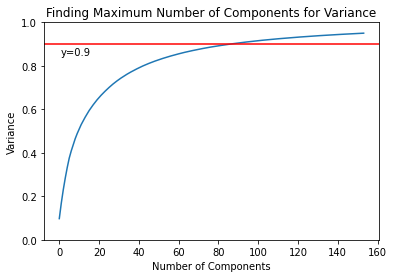

In [17]:
pca2 = PCA(n_components = 0.95)
pca2.fit_transform(new_data)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
cn = np.sum(1 - (cumsum > 0.9))
print(cn)


plt.plot(cumsum)
plt.title("Finding Maximum Number of Components for Variance")
plt.ylabel("Variance")
plt.xlabel("Number of Components")
plt.ylim(0.0,1.0)
plt.axhline(y=0.9,color='red')
plt.text(0.5, 0.85, "y=0.9")

np.argmax(cumsum>=0.9)


In [ ]:
a = [[1,2,3],[1,2,3],[1,2,3]]


TypeError: ignored